In [119]:
import pandas as pd           # Data handling
import numpy as np            # Math & arrays
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns             # Prettier plots
from sklearn.model_selection import train_test_split
!pip install -U xgboost

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df1 = pd.read_csv('/content/drive/My Drive/cleaned_data/merged_articles_transactions.csv')
df=df1.copy()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104547 entries, 0 to 104546
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   article_id                    104547 non-null  int64  
 1   price                         104547 non-null  float64
 2   product_type_name             104547 non-null  object 
 3   product_group_name            104547 non-null  object 
 4   graphical_appearance_name     104547 non-null  object 
 5   colour_group_name             104547 non-null  object 
 6   perceived_colour_value_name   104547 non-null  object 
 7   perceived_colour_master_name  104547 non-null  object 
 8   department_name               104547 non-null  object 
 9   index_group_name              104547 non-null  object 
 10  section_name                  104547 non-null  object 
 11  garment_group_name            104547 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory u

,article_id,price,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_group_name,section_name,garment_group_name
0,455504002,0.025407,dress,garment full body,solid,light pink,dusty light,pink,kids dress-up/football,baby/children,"kids accessories, swimwear & d",accessories
1,618129001,0.028797,sweater,garment upper body,melange,dark grey,dark,grey,knitwear,menswear,contemporary smart,knitwear
2,572524001,0.032186,dress,garment full body,other structure,black,dark,black,dress,ladieswear,womens tailoring,dresses ladies
3,612674004,0.013542,bra,underwear,embroidery,black,dark,black,expressive lingerie,ladieswear,womens lingerie,"under-, nightwear"
4,518529001,0.025424,dress,garment full body,solid,black,dark,black,dresses,divided,divided collection,dresses ladies
5,563988004,0.007610,shorts,garment lower body,solid,greenish khaki,dusty light,khaki green,kids girl trouser,baby/children,kids girl,trousers
6,635425002,0.016932,blouse,garment upper body,stripe,blue,medium dusty,blue,blouse,ladieswear,womens everyday collection,blouses
7,605154001,0.008458,vest top,garment upper body,lace,black,dark,black,tops fancy jersey,divided,divided collection,jersey fancy
8,398947001,0.003373,sunglasses,accessories,solid,gold,bright,metal,small accessories,divided,divided accessories,accessories
9,599037001,0.010153,hat/beanie,accessories,solid,light pink,dusty light,pink,baby toys/acc,baby/children,baby essentials & complements,accessories


In [122]:
df.columns = df.columns.str.strip()

# 2) Verify what's actually present
print(sorted(df.columns.tolist()))

# 3) Choose categorical columns, but only keep those that exist
categorical_columns = ["product_type_name",
        "product_group_name",
        "graphical_appearance_name",
        "colour_group_name",
        "perceived_colour_value_name",
        "perceived_colour_master_name",
        "department_name",
        "index_group_name",
        "section_name",
        "garment_group_name"]
categorical_columns = [c for c in categorical_columns if c in df.columns]

# 4) One-hot encode only existing columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# 5) Drop non-feature columns that still exist, including 'prod_name'
df.drop(columns=[c for c in ['article_id', 'prod_name','product_code'] if c in df.columns],
        inplace=True)

# 6) Features / target
X = df.drop(columns=['price'])
y = df['price']

# 7) Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['article_id', 'colour_group_name', 'department_name', 'garment_group_name', 'graphical_appearance_name', 'index_group_name', 'perceived_colour_master_name', 'perceived_colour_value_name', 'price', 'product_group_name', 'product_type_name', 'section_name']


In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_lr = linear_model.predict(X_test)
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

Linear Regression R^2: 0.5098
Linear Regression RMSE: 0.02


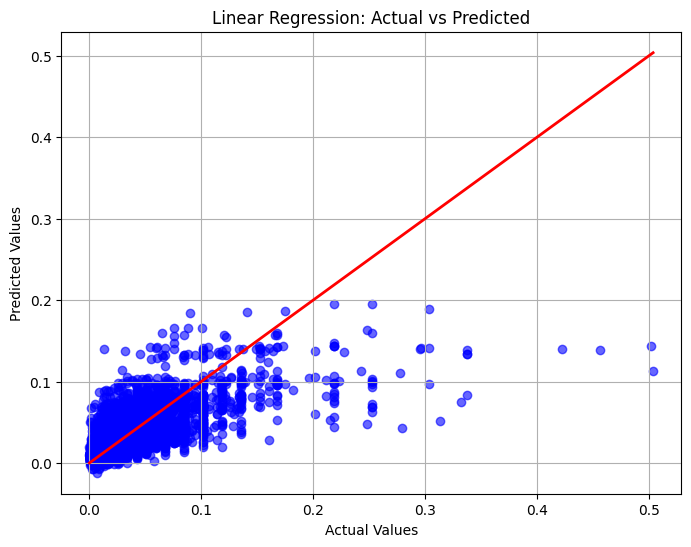

In [124]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2)  # ideal fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [125]:
df.head()

,price,product_type_name_alice band,product_type_name_baby bib,product_type_name_backpack,product_type_name_bag,product_type_name_ballerinas,product_type_name_beanie,product_type_name_belt,product_type_name_bikini top,product_type_name_blanket,...,garment_group_name_shorts,garment_group_name_skirts,garment_group_name_socks and tights,garment_group_name_special offers,garment_group_name_swimwear,garment_group_name_trousers,garment_group_name_trousers denim,"garment_group_name_under-, nightwear",garment_group_name_unknown,garment_group_name_woven/jersey/knitted mix baby
0,0.025407,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.028797,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.032186,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.013542,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.025424,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [127]:
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=600, learning_rate=0.13, max_depth=7, min_child_weight=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost R^2: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")

XGBoost R^2: 0.5554
XGBoost RMSE: 0.02


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions and metrics
y_pred_rf = rf_model.predict(X_test) print(f"Random Forest R^2: {r2_score(y_test, y_pred_rf):.4f}") print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

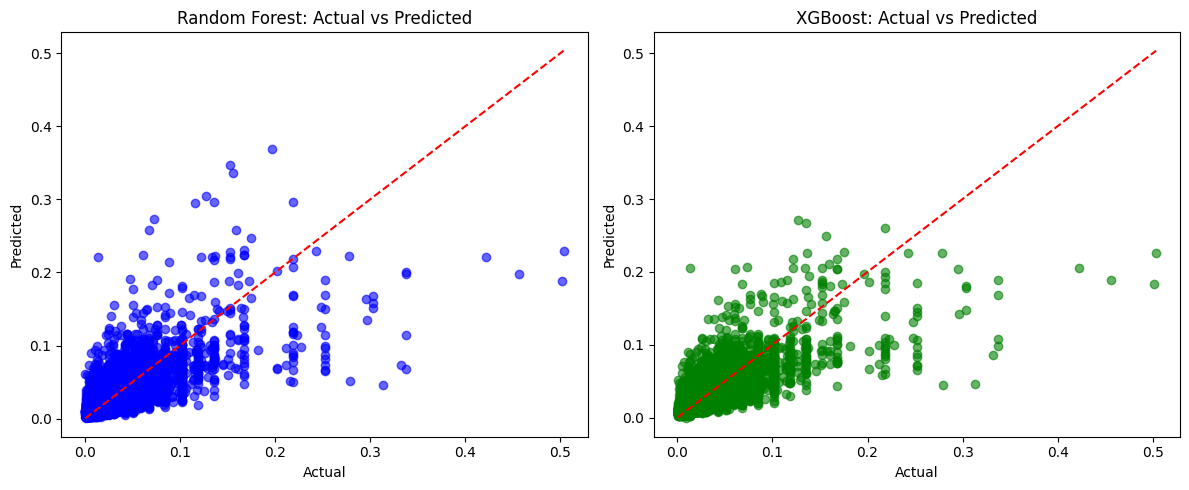

In [128]:
plt.figure(figsize=(12,5))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

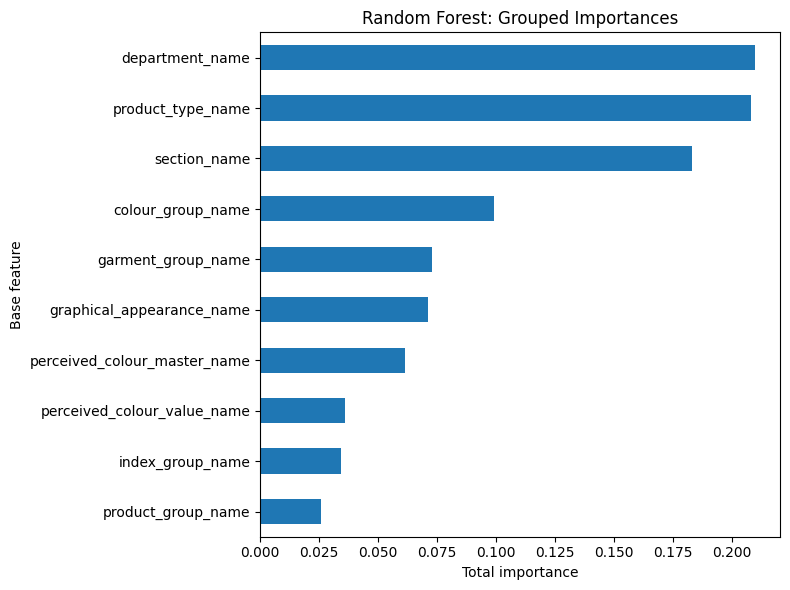

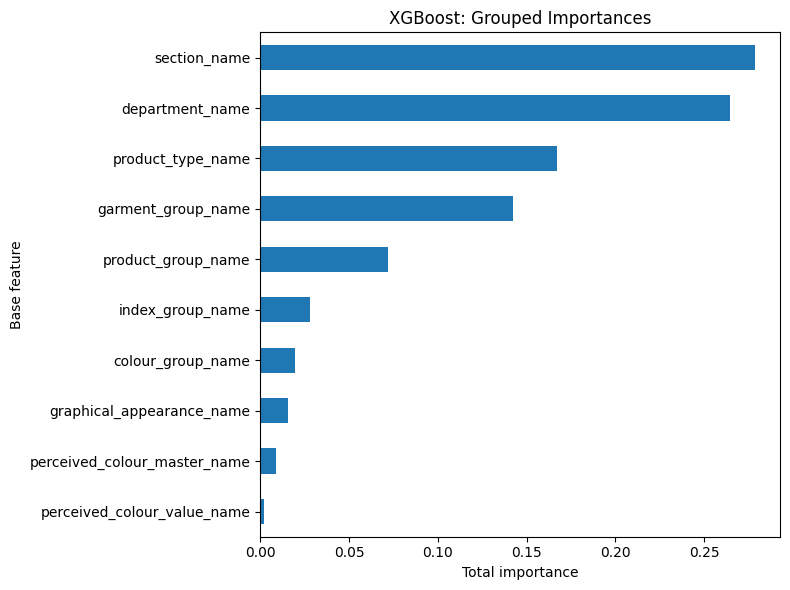

In [129]:
def base_name(col):
    # adjust prefixes to match your get_dummies columns
    for p in ["product_type_name",
        "product_group_name",
        "graphical_appearance_name",
        "colour_group_name",
        "perceived_colour_value_name",
        "perceived_colour_master_name",
        "department_name",
        "index_group_name",
        "section_name",
        "garment_group_name"]:
        if col.startswith(p + "_"):
            return p
    return col  # numeric columns like price (not used in X)

# Random Forest grouped
rf_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_grouped = rf_imp.groupby(base_name).sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
rf_grouped.head(15)[::-1].plot.barh()
plt.title("Random Forest: Grouped Importances")
plt.xlabel("Total importance"); plt.ylabel("Base feature")
plt.tight_layout(); plt.show()

# XGBoost grouped
xgb_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_grouped = xgb_imp.groupby(base_name).sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
xgb_grouped.head(15)[::-1].plot.barh()
plt.title("XGBoost: Grouped Importances")
plt.xlabel("Total importance"); plt.ylabel("Base feature")
plt.tight_layout(); plt.show()

In [130]:
# --- Predicting price for a custom input with median/mode filling ---
# Compute median/mode for all training columns
fill_values = {}
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        fill_values[col] = X[col].median()   # numeric → median
    else:
        fill_values[col] = X[col].mode()[0]  # categorical → mode

# Show all model features for reference
print("Model expects these features:\n", list(X.columns))

# Example custom input (these are your interpretable product attributes)
custom_input = {
    'product_type_name_sweater': [1],           # one-hot encoded column (set 1 for active category)
    'graphical_appearance_name_melange': [1],
    'colour_group_name_pink': [1],
}

# Convert to DataFrame and reindex to match model’s expected columns
custom_df = pd.DataFrame(custom_input).reindex(columns=X.columns)

# Fill missing columns with median/mode
custom_df = custom_df.fillna(fill_values)

# --- Predict with all models ---
predicted_lr = linear_model.predict(custom_df)[0]
predicted_xgb = xgb_model.predict(custom_df)[0]
predicted_rf = rf_model.predict(custom_df)[0]

print(f"Predicted Price (Linear Regression): {predicted_lr:.4f}")
print(f"Predicted Price (XGBoost):           {predicted_xgb:.4f}")
print(f"Predicted Price (Random Forest):     {predicted_rf:.4f}")

Model expects these features:
 ['product_type_name_alice band', 'product_type_name_baby bib', 'product_type_name_backpack', 'product_type_name_bag', 'product_type_name_ballerinas', 'product_type_name_beanie', 'product_type_name_belt', 'product_type_name_bikini top', 'product_type_name_blanket', 'product_type_name_blazer', 'product_type_name_blouse', 'product_type_name_bodysuit', 'product_type_name_bootie', 'product_type_name_boots', 'product_type_name_bra', 'product_type_name_bra extender', 'product_type_name_bracelet', 'product_type_name_braces', 'product_type_name_bucket hat', 'product_type_name_bumbag', 'product_type_name_cap', 'product_type_name_cap/peaked', 'product_type_name_cardigan', 'product_type_name_chem. cosmetics', 'product_type_name_clothing mist', 'product_type_name_coat', 'product_type_name_costumes', 'product_type_name_cross-body bag', 'product_type_name_cushion', 'product_type_name_dog wear', 'product_type_name_dress', 'product_type_name_dungarees', 'product_type_name